# Monte Carlo Simulations in Physics

#### Team Members: Tejas Prakash and Manasvini Nataraja

We will begin by describing what the Monte Carlo method is and then delve into three applications that we found:
1) The Birthday-Matching Problem
2) Approximating Pi
3) Modelling Orbitals

The Monte Carlo method refers to a wide variety of algorithms which depend on repeated random sampling. The Monte Carlo method is typically used in the following ways: optimization, integration, and creating draws from a probability distribution. The basic steps to perform the Monte Carlo method are:
- Define the domain of possible inputs
- Produce inputs randomly from a probability distribution over the domain.
- Keep repeating the process until enough data is available to create a sample which is near an infinite number of possible outcomes.

##### How Monte Carlo Method is Applied To Integration:

The Monte Carlo method technique in integration is typically used to calculate definite integrals. Other algorithms typically solve the integrand at a regular grid. Monte Carlo randomly chooses points at which the integrand is solved. This method is particularly useful for more complicated integrals. Normally to evaluate integrals you apply the trapezoidal sum rule. $ \int_{a}^{b} f(x) =  dx (b -a) \centerdot \frac{1}{2} (f(a) +f(b))$. However, the Monte Carlo Method approaches integration in a different way. By randomly selecting points at which the integrand is evaluated.



##### How Monte Carlo Method is Applied To Probability Distribution:

The purpose of probability distributions is to describe the populations of real-life variables. The way the Monte Carlo Method applies probability distributions is by using a distribution for any variable with an uncertainty. After that, it recalculates the results several times with a different set of random variables within the estimated range each time.

## Birthday-Matching problem

The birthday-matching problem answers the following question: if there is a certain number of people in a room, how many of those people share the same birthday? Here is how the following method can be used to solve this question: 
- Choose a random sample of size N (with replacement) from the set of birthdays. That sample represents a "room" of N people.

- Determine whether any of the birthdays in the room match. There are N(N-1)/2 pairs of birthdays to check.

- Repeat this process for thousands of rooms and compute the proportion of rooms that contain a match. This is a Monte Carlo estimate of the probability of a shared birthday.

- If desired, simulate rooms of various sizes, such as N=2, 3, 4,..., 60, and plot the results (not covered in this project). 

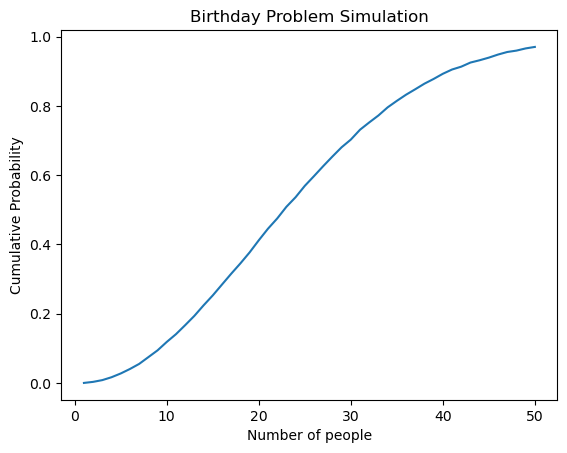

In [100]:
import random 
import matplotlib.pyplot as plt
trials = 100000 #Number of 'rooms' considered
num_people = 50 #Number of people in the room
x_list = [] #A list to store x-values.
for x in range(1,num_people+1):
  x_list.append(x) #x_list appears like: [1,2...num_people]
def birthday_trials(people, trials):
    same_birthdays = 0 #Initializing same birthdays to 0, it is the counter.
    for _ in range(trials): #We run the trials.
      birthdays = [] #A list to store the randomized birthdays.
      for _ in range(people):
        Day = random.randint(1,365) #A day is selected in the interval.
        birthdays.append(Day) #Adds the selected day to the list, for every person.
      if len(birthdays) != len(set(birthdays)): #The set is used to remove duplicated values. If it does not have the same length as the original list, atleast one birthday is shared.
        same_birthdays += 1 #If it does not have the same length as the original list, atleast one birthday is shared, so the counter increases by 1.

    probability = same_birthdays / trials #Computing the probability for given number of trials and number of "same birthdays" in the sample.
    return probability
y_list = [] #A list to store y-values.
for people in x_list:
  y = birthday_trials(people, trials) #Runs birthday_trials function, returning a probability for every x value in x_list.
  y_list.append(y) #Each probability is added to y_list.

plt.plot(x_list, y_list) #We plot x,y.
plt.xlabel('Number of people')
plt.ylabel('Cumulative Probability')
plt.title('Birthday Problem Simulation')
plt.show()#The set is used to remove duplicated values. If it does not have the same length as the original list, atleast one birthday is shared.

In [61]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import random
def birthday_trials(num_people):
  birthdays = [] #A list to store the randomized birthdays.
  for _ in range(num_people):
    Day = random.randint(1,365) #A day is selected in the interval.
    birthdays.append(Day) #Adds the selected day to the list, for every person.
  return len(set(birthdays)) #Returns a set to remove duplicated values.
def main():
  num_people = 23 #Number of people (sample size for probability)
  num_trials = 100000 #Number of 'rooms' considered
  same_birthdays = 0 #Counter for number or shared birthdays
  for _ in range(num_trials):
    if birthday_trials(num_people) != num_people: #If it does not have the same length as the original list, atleast one birthday is shared.
      same_birthdays += 1 #If it does not have the same length as the original list, atleast one birthday is shared, so the counter increases by 1.
  probability = same_birthdays / num_trials #Computes final probability
  print(f"Probablity of shared birthday: {probability}") #Displays the final probability.
main()

Probablity of shared birthday: 0.50718


Mathematically, we would calculate it as follows: $P(A) = \frac{365!}{(365-23)!}\frac{1}{365^{23}} \approx 0.492703 $, where $P(A)$ is the probability that there are no shared birthdays.

$P(B) = 1 - P(A) \approx 0.507297$, where $P(B)$ is the probability that there is a shared birthdays amongst the 23 individuals.

In [193]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import random
def birthday_trials(num_people):
  birthdays = [] #A list to store the randomized birthdays.
  for _ in range(num_people):
    Day = random.randint(1,365) #A day is selected in the interval.
    birthdays.append(Day) #Adds the selected day to the list, for every person.
  return len(set(birthdays)) #Returns a set to remove duplicated values.
def main():
  num_people = 50 #Number of people (sample size for probability)
  num_trials = 100000 #Number of 'rooms' considered
  same_birthdays = 0 #Counter for number or shared birthdays
  for _ in range(num_trials):
    if birthday_trials(num_people) != num_people: #If it does not have the same length as the original list, atleast one birthday is shared.
      same_birthdays += 1 #If it does not have the same length as the original list, atleast one birthday is shared, so the counter increases by 1.
  probability = same_birthdays / num_trials #Computes final probability
  print(f"Probablity of shared birthday: {probability}") #Displays the final probability.
main()

Probablity of shared birthday: 0.97034


Calculating the probability like before: $P(A) = \frac{365!}{(365-50)!}\frac{1}{365^{50}} \approx 0.029626 $.

$P(B) = 1 - P(A) \approx 0.970374$

Surprisingly, it takes only 23 people in a room for the probability of a shared birthday to be around 0.5 and only 50 for the probability to exceed 0.97. This result contradicts our intuition. 

## Approximating Pi

The Pi problem is an example of how Monte Carlo method can be used in integration. 

In order to find the estimates of Pi for the Monte Carlo method, we need the “average value method”. This uses several random points on an interval in order to estimate the average value of continuous function on the interval. The other method is the "area method", which enables you to estimate areas by generating a uniform sample of points and counting how many fall into a planar region. In the code below, we use the area method.

How do we model this problem in Python? Let us do the following:
- Create a circle and set dimensions for the circle using the radius.
- Compute $\sqrt{r^2-x^2}$.
- Introduce the number of points to add. Create a counter.
- Generate random $a$ and $b$ values.
- For each set of generated values, evaluate the whether the point falls in the circle.
- If $b<\sqrt{r^2-x^2}$, add the coordinates to a list and add 1 to counter.
- Repeat the function until the limit is reached.

3.1444


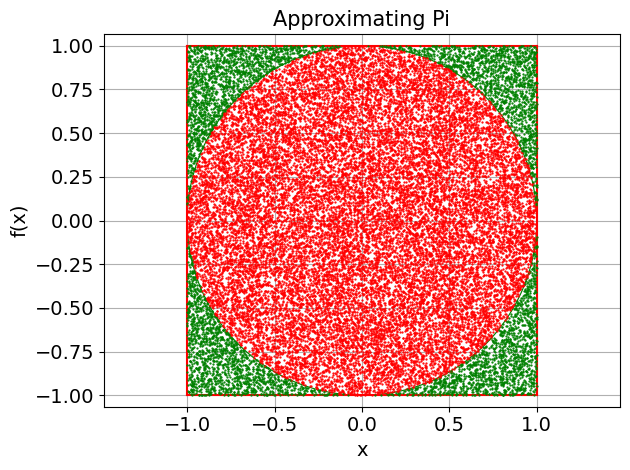

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import random
def randomizer(u):
  radius = 1 #Creating a circle with a radius of 1 unit.
  x = np.linspace(-1,1,1000) #Generating a 1000 points between -1 and 1.
  y = ((radius**2)-(x**2))**(1/2) #Models top half of circle.
  z = -((radius**2)-(x**2))**(1/2) #Models bottom half of circle.
  plt.plot(x,y,'g',linewidth=0.85) #Green top semicircle
  plt.plot(x,z,'g',linewidth=0.85) #Green bottom semicircle
  plt.plot([-1,1],[1,1],'r') #Top component of the square.
  plt.plot([1,1],[1,-1],'r') #Right component of the square.
  plt.plot([-1,-1],[-1,1],'r') #Left component of the square.
  plt.plot([-1,1],[-1,-1],'r') #Bottom component of the square.
  i = 0 #Counter 1
  n = 0 #Counter 2
  l = 0 #Counter 3
  a =  np.random.uniform(-1, 1) #a is a randomly selected point in the range (-1,1).
  b =  np.random.uniform(-1, 1) #b is a randomly selected point in the range (-1,1).
  while i<u: #Runs the function 'u' times.
    def func(k):
      plt.plot(a,b,'o',color=k,markersize=0.6) #Plots (a,b)
    y1=((radius**2)-(a**2))**(1/2) #Given the x value, we generate the corresponding y value attained through calculation. 
    if abs(b)<=abs(y1): 
      n+=1
      func('red') #If b falls in the corresponding range, the point is added as a red dot inside the circle.
    else:
      l+=1
      func('green') #If b falls in the corresponding range, the point is added as a green dot inside the circle.
    a =  np.random.uniform(-1, 1) #a is regenerated.
    b =  np.random.uniform(-1, 1) #b is regenerated.
    i+=1
  pi = (n/(l+n))*4 #Pi is calculated through the ratio.
  print(pi)
randomizer(30000) #30000 sample points.
xlabel = plt.xlabel('x',fontsize=14) 
ylabel = plt.ylabel('f(x)', fontsize=14) 
title = plt.title(f'Approximating Pi',fontsize=15) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
fig = plt.gcf() 
ax = plt.gca() 
ax.axis('equal') 
plt.tight_layout()

We know that the area of a circle with a radius r is $\pi r^2$. The unit circle has an area of $\pi$ units. This is the simplest case involving a Monte Carlo method to integrate the area.

As $u\to\infty$, our code can be expected to give us an exact value of $\pi$.

## Modelling Orbitals

We can also make use of Monte Carlo methods for concepts in quantum mechanics, particularly in simulating the structure of an atom. To see how, we must first delve into the mathematics that governs the physical shape of an orbital.

Let us begin with the time dependent Schrödinger's equation as used for non-relativistic particles.

$\hat{H}\Psi=E\Psi$

This can be rewritten as follows:

$[-\frac{h^2}{8\pi^2m_e}]\Psi(r,\theta,\phi)=E\Psi$

$-\frac{h^2}{8\pi^2m_e}[\frac{1}{r^2}\frac{\partial}{\partial r}r^2\frac{\partial\Psi}{\partial r}+\frac{1}{r^2sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial\Psi}{\partial\theta}+\frac{1}{r^2sin^2\theta}\frac{\partial^2\Psi}{\partial\phi^2}]-\frac{Ze^2}{4\pi\epsilon_0 r}\Psi=E\Psi$

Note: Z is the atomic number, we use it to include Hydrogen like-ions such as $He^+$ and $H^{2+}$. 

After we seperate the variable, we can segregate two components: one angular and one radial.

$-\frac{h^2}{8\pi^2m_e}[\frac{1}{R}\frac{\partial}{\partial r}r^2\frac{\partial R}{\partial r}+\frac{1}{Y}\frac{1}{sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial Y}{\partial\theta}+\frac{1}{Y}\frac{1}{sin^2\phi}\frac{\partial^2 Y}{\partial\phi^2}]-\frac{Ze^2}{4\pi\epsilon_0 r}\Psi-Er^2=0$

This allows us to write:

$\Psi(r,\theta,\phi)=R(r)Y(\theta,\phi)$

where $R(r)$ is the radial component and $Y(\theta,\phi)$ is the angular component.

The equation corresponding to the radial bit is: $-\frac{h^2}{8\pi^2m_e}\frac{1}{R}\frac{\partial}{\partial r}r^2\frac{\partial R}{\partial r}-\frac{Ze^2}{4\pi\epsilon_0 r}\Psi-Er^2=-\alpha$.

The equation corresponding to the angular bit is: $-\frac{h^2}{8\pi^2m_e}[\frac{1}{Y}\frac{1}{sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial Y}{\partial\theta}+\frac{1}{Y}\frac{1}{sin^2\phi}\frac{\partial^2 Y}{\partial\phi^2}]=\alpha$

We are using a constant $\alpha$, which cancels out after the addition of the two components, giving us our original equation.

Let us analyze the angular component, $-\frac{h^2}{8\pi^2m_e}[\frac{1}{Y}\frac{1}{sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial Y}{\partial\theta}+\frac{1}{Y}\frac{1}{sin^2\phi}\frac{\partial^2 Y}{\partial\phi^2}]=\alpha$. 

It can be written as: $-\frac{h^2}{8\pi^2m_er^2}[\frac{1}{sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial Y}{\partial\theta}+\frac{1}{sin^2\phi}\frac{\partial^2 Y}{\partial\phi^2}]=\frac{\alpha}{r^2}Y$. 

This corresponds to the rigid rotor form of the Schrödinger equation, allowing us to evaluate this component as: $Y_{lm}(\theta,\phi)=N_{lm}P^m_l(\theta,\phi)e^{im\phi}$.

As $\frac{\alpha}{r^2}$ is equivalent to the energy E, we can say that $\alpha=r^2E$.

The energy of the system in a rigid rotor is $E_l=\frac{h^2}{8\pi^2m_er^2}l(l+1)$, and so $\alpha=\frac{h^2}{8\pi^2m_er^2}l(l+1).$

Taking this into account, we move on to the radial bit and rewrite it as $-\frac{h^2}{8\pi^2m_er^2}\frac{d}{dr}r^2\frac{dR}{dr}-\frac{Ze^2}{4\pi\epsilon_0}\frac{1}{r}R-ER=-\alpha\frac{R}{r^2}$ and the rearrange it to: $-\frac{h^2}{8\pi^2m_er^2}\frac{d}{dr}r^2\frac{dR}{dr}+\frac{h}{8\pi^2m_er^2}Rl(l+1)-\frac{Ze^2}{4\pi\epsilon_0}\frac{1}{r}R-ER=0$ 

When we take l as 0, we get the simplest case, which is: $-\frac{h^2}{8\pi^2m_er^2}\frac{d}{dr}r^2\frac{dR}{dr}-\frac{ze^2}{4\pi\epsilon_0}\frac{1}{r}R-ER=0$. 

Mathematically a constant c must equal to $\frac{Ze^2\pi m_e}{\epsilon_0h^2}$ in order to fit $R(r)$ of a general form $e^{-cr}$ and to satisfy Schrödinger's equation.

We denote the inverse of this constant, $\frac{\epsilon_0h^2}{Ze^2\pi m_e}$, as $a_0$ or the Bohr radius. With a similar logic, we can derive an equation for energy: $E=-\frac{c^2h^2}{8\pi^2m_e}=-\frac{h^2}{8\pi^2m_e}\frac{Z^2}{a_0^2}$.

However, to generalize the equation for every value of l, we write $R_{nl}(r)=N(\frac{2Zr}{na_0})L_{n-l-1}^{2l+1}(\frac{2Zr}{na_0})$, where $L_{n-l-1}^{2l+1}$ are a set of Laguerre polynomials. These polynomials are used because they sastisfy Schrödinger's equation.

In summary, $\Psi(r,\theta,\phi)=R_{nl}(r)Y_{lm}(\theta,\phi)$, where $Y_{lm}(\theta,\phi)=N_{lm}P^m_l(\theta,\phi)e^{im\phi}$ and $R_{nl}(r)=N(\frac{2Zr}{na_0})L_{n-l-1}^{2l+1}(\frac{2Zr}{na_0})$.

The probability density of the system is given by $|\Psi_{nlm}(r,\theta,\phi)|^2=|R_{nl}(r)|^2|Y_{lm}(\theta,\phi)|^2$.

It is important to note that n is the principial quantum number, l is the angular momentum quantum number and m is the magnetic quantum number. n varies from {1,2...}, while l varies from {0,1...n-1} and m varies from {-l...l}.

In the context of Chemistry $n=1, l=0, m=0$ is interpreted as a $1s$ orbital. Other examples include $n=2, l=0, m=0$ which is a $2s$ orbital, $n=2, l=1, m=0$, $2p_z$ orbital.

How do we model an orbital in Python? Similar to the Pi example from earlier, we do the following:
- Create a 'box' and set dimensions for the box.
- Compute the upper bounds of $|\Psi_{nlm}(r,\theta,\phi)|^2$.
- Introduce the number of points to add. Create a counter.
- Generate random $\frac{\Delta x}{2}, \frac{\Delta y}{2}$ and $\frac{\Delta z}{2}$ values.
- For each set of generated values, evaluate the spherical coordinates.
- Generate a $w$ in the range of the upper limit.
- If $w<|\Psi_{nlm}(r,\theta,\phi)|^2$, add the coordinates to a list and add 1 to counter.
- Repeat the function until the limit is reached.

The same as before, we ensure that we avoid pseudo-random numbers, so we get accurate results. 

#### Let us start with n = 1, l = 0, m = 0. 

$P_l^{|m|}$, the Legendre polynomial, reduces to 1. Overall, $Y_{lm}(\theta,\phi)=\sqrt{\frac{1}{4\pi}}$.

Letting $\rho$ denote $\frac{2Zr}{na_0}$, $R_{nl}(r)=\sqrt{(\frac{2Z}{na_0})^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\rho/2}\rho^lL^{2l+1}_{n+l-1}(\rho)$.

In [25]:
import scipy 
n=1
l=0
m=0
print(scipy.special.laguerre(n-l-1,2*l+1))

 
1


$R_{nl}$ simplifies to $\frac{2}{a_0^{3/2}}e^{-\frac{r}{a_0}}$.

$\Psi(r,\theta,\phi)=\frac{1}{\sqrt{\pi}a_0^{3/2}}e^{-\frac{r}{a_o}}$, $|\Psi(r,\theta,\phi)|^2=\frac{1}{\pi a_0^{3}}e^{-\frac{2r}{a_o}}$

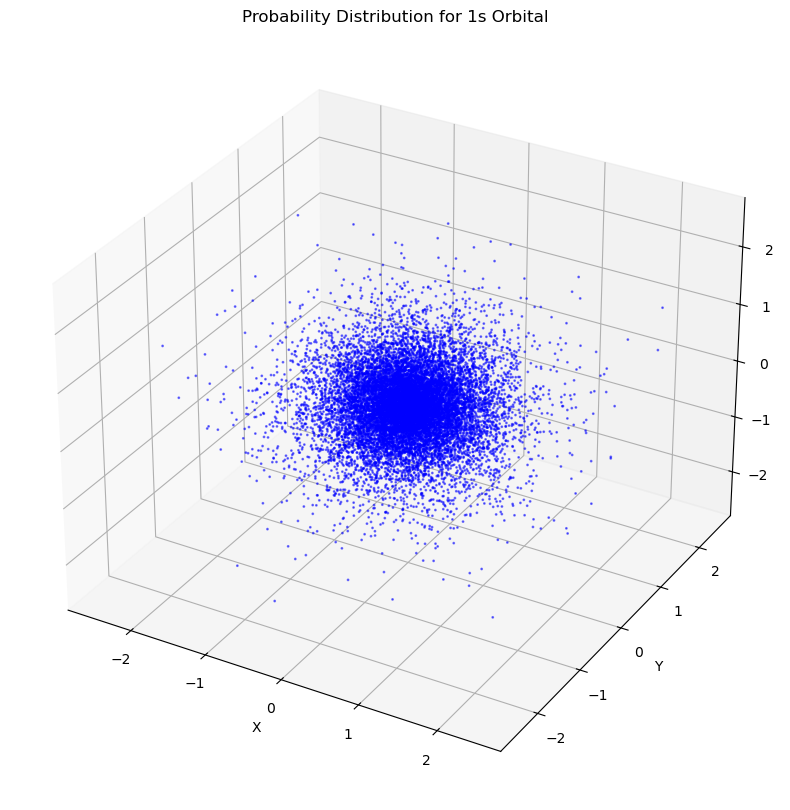

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
a0 = 0.529177 #Bohr radius in Angstroms
max = 1/(np.pi*(a0**3)) #Upper limit 
point_list = [] #List to store points in the range.
delta_x, delta_y, delta_z = 5, 5, 5 #Dimensions of the box
def cartesian_to_spherical(x, y, z): #Function to convert from cartesian to spherical coordinates.
    r = np.sqrt(x**2 + y**2 + z**2)
    return r    
def run(u):
    i = 0 #Counter
    while i<u:
      x = np.random.uniform(-delta_x/2, delta_x/2) #Randomly generated x-value.
      y = np.random.uniform(-delta_y/2,delta_y/2) #Randomly generated y-value.
      z = np.random.uniform(-delta_z/2,delta_z/2) #Randomly generated z-value.
      w = np.random.uniform(0,max) #Randomly generated value in range of upper limit.
      r = cartesian_to_spherical(x,y,z) #Setting the returned r value to a variable.
      psi2 = (1/(np.pi*(a0**3)))*np.e**((-2*r)/a0) #The psi^2 
      if w<=psi2:
        point_list.append((x,y,z)) #Adding the randomly generated coordinates to the list if they fall in range.
        i+=1
run(15000) #15000 points sampled.
point_list = np.array(point_list) #Converting the list to a numpy array.
fig = plt.figure(figsize=(10, 10)) #Dimensions of plot.
ax = fig.add_subplot(projection='3d') #A 3D subplot.
ax.scatter(point_list[:, 0], point_list[:, 1], point_list[:, 2], s=1, c='blue', alpha=0.5) #Extracting coordinates from the array and plotting.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Probability Distribution for 1s Orbital")
plt.show()

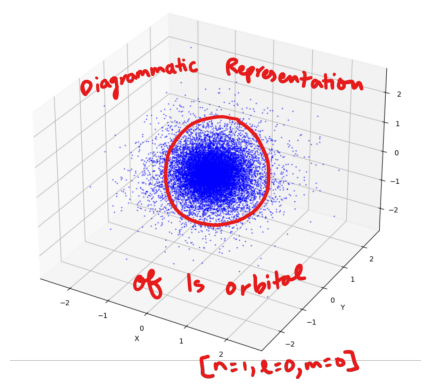

In [252]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://github.com/TP247/RamanData/blob/main/1s.png?raw=true" 
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')  
plt.show()

#### We will now consider n = 2, l = 0, m = 0.

$Y_{lm}(\theta,\phi)=\sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(cos(\theta))e^{im\phi}$

$Y_{00}(\theta,\phi)=\sqrt{\frac{1}{4\pi}}$

$R_{nl}(r)=\sqrt{(\frac{2Z}{na_0})^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\rho/2}\rho^lL^{2l+1}_{n+l-1}(\rho)$

In [100]:
import scipy 
n=2
l=0
m=0
print(scipy.special.laguerre(n-l-1,2*l+1))

 
1 x - 1


$R_{20} = (\frac{1}{\sqrt{2a_0^3}})(1-\frac{r}{a_0})e^{-\frac{r}{2a_0}}$

$\Psi(r,\theta,\phi)= (\frac{1}{\sqrt{2a_0^3}})(1-\frac{r}{a_0})e^{-\frac{r}{2a_0}}\sqrt{\frac{1}{4\pi}}$

$|\Psi(r,\theta,\phi)|^2$ can be evaluated in the code.

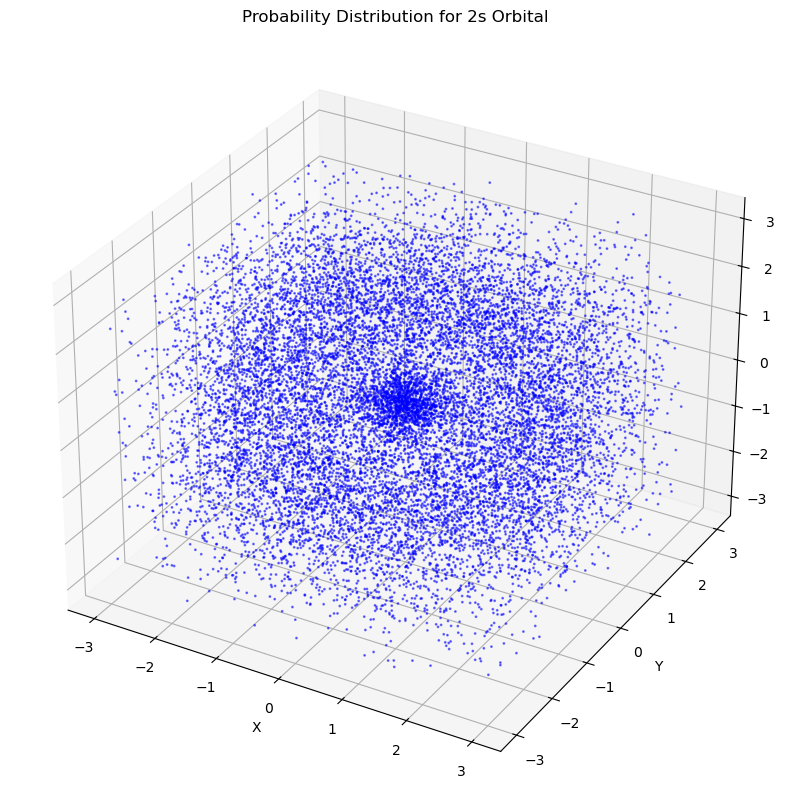

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
a0 = 0.529177 #Bohr radius in Angstroms
max = 1/(np.pi*(a0**3)) #Upper limit 
point_list = [] #List to store points in the range.
delta_x, delta_y, delta_z = 6, 6, 6 #Dimensions of the box
def cartesian_to_spherical(x, y, z): #Function to convert from cartesian to spherical coordinates.
    r = np.sqrt(x**2 + y**2 + z**2)
    return r    
def run(u):
    i = 0 #Counter
    while i<u:
      x = np.random.uniform(-delta_x/2, delta_x/2) #Randomly generated x-value.
      y = np.random.uniform(-delta_y/2,delta_y/2) #Randomly generated y-value.
      z = np.random.uniform(-delta_z/2,delta_z/2) #Randomly generated z-value.
      w = np.random.uniform(0,max) #Randomly generated value in range of upper limit.
      r = cartesian_to_spherical(x,y,z) #Setting the returned r value to a variable.
      psi = (1 / np.sqrt(8 * np.pi * a0**3)) * (2 - r / a0) * np.exp(-r / (2 * a0))
      psi2 = psi**2#The psi^2 
      if w<=psi2:
        point_list.append((x,y,z)) #Adding the randomly generated coordinates to the list if they fall in range.
        i+=1
run(15000) #15000 points sampled.
point_list = np.array(point_list) #Converting the list to a numpy array.
fig = plt.figure(figsize=(10, 10)) #Dimensions of plot.
ax = fig.add_subplot(projection='3d') #A 3D subplot.
ax.scatter(point_list[:, 0], point_list[:, 1], point_list[:, 2], s=1, c='blue', alpha=0.5) #Extracting coordinates from the array and plotting.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Probability Distribution for 2s Orbital")
plt.show()

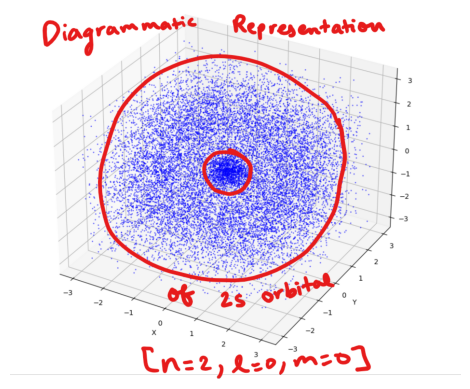

In [250]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://github.com/TP247/RamanData/blob/main/2s.png?raw=true" 
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')  
plt.show()

There exists a spherical node, an area where electrons can not reside.

#### Now for n = 2, l = 1, m = 0.

$Y_{lm}(\theta,\phi)=\sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(cos(\theta))e^{im\phi}$

$Y_{10}(\theta,\phi) = \sqrt{\frac{3}{4\pi}}cos(\theta)$

$R_{nl}(r)=\sqrt{(\frac{2Z}{na_0})^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\rho/2}\rho^lL^{2l+1}_{n+l-1}(\rho)$

In [ ]:
import scipy 
n=2
l=1
m=0
print(scipy.special.laguerre(n-l-1,2*l+1))

$R_{21}(r) = \sqrt{\frac{1}{24a_0^3}}\frac{r}{a_0}e^{-\frac{r}{2a_0}}$

$\Psi(r,\theta,\phi)=\sqrt{\frac{1}{24a_0^3}}\frac{r}{a_0}e^{-\frac{r}{2a_0}}\sqrt{\frac{3}{4\pi}}cos(\theta)$

We will evaluate $|\Psi(r,\theta,\phi)|^2$ in the code.

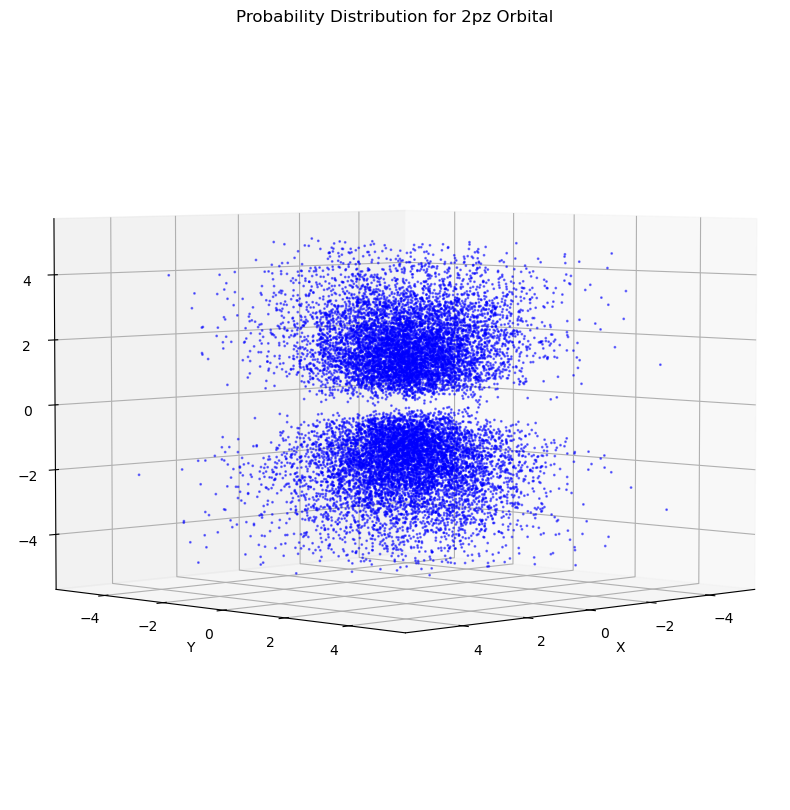

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
a0 = 0.529177 #Bohr radius in Angstroms
max = 1/(24*np.pi*(a0**3)) #Upper limit 
point_list = [] #List to store points in the range.
delta_x, delta_y, delta_z = 10, 10, 10 #Dimensions of the box
def cartesian_to_spherical(x, y, z): #Function to convert from cartesian to spherical coordinates.
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r) 
    return r,theta    
def run(u):
    i = 0 #Counter
    while i<u:
      x = np.random.uniform(-delta_x/2, delta_x/2) #Randomly generated x-value.
      y = np.random.uniform(-delta_y/2,delta_y/2) #Randomly generated y-value.
      z = np.random.uniform(-delta_z/2,delta_z/2) #Randomly generated z-value.
      w = np.random.uniform(0,max) #Randomly generated value in range of upper limit.
      r,theta = cartesian_to_spherical(x,y,z) #Setting the returned r and theta value to a variable.
      psi = (1 / np.sqrt(24 * a0**3)) * (r / a0) * np.exp(-r / (2 * a0)) * np.sqrt(3 / (4 * np.pi)) * np.cos(theta) #Psi 
      psi2 = psi**2 #Psi^2
      if w<=psi2:
        point_list.append((x,y,z)) #Adding the randomly generated coordinates to the list if they fall in range.
        i+=1
run(15000) #15000 points sampled.
point_list = np.array(point_list) #Converting the list to a numpy array.
fig = plt.figure(figsize=(10, 10)) #Dimensions of plot.
ax = fig.add_subplot(projection='3d') #A 3D subplot. 
ax.scatter(point_list[:, 0], point_list[:, 1], point_list[:, 2], s=1, c='blue', alpha=0.5) #Extracting coordinates from the array and plotting.
ax.view_init(elev=4, azim=45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Probability Distribution for 2pz Orbital")
plt.show()

The image below shows the typical depiction of the 2pz orbital. It is important to note that the node is a plane where the probability of finding an electron is 0.  

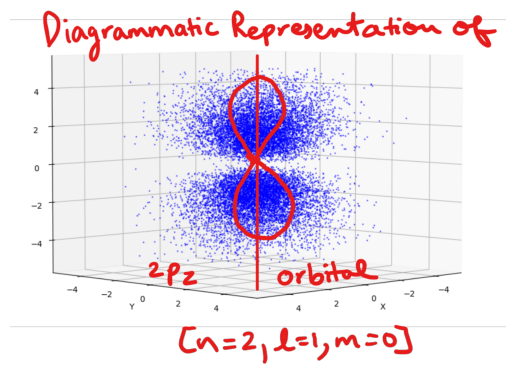

In [248]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://github.com/TP247/RamanData/blob/main/2pz_orbital.png?raw=true" 
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')  
plt.show()

#### Lastly, we will consider  n = 3, l = 2, m = 0.

$Y_{lm}(\theta,\phi)=\sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(cos(\theta))e^{im\phi}$

$Y_{20}(\theta,\phi) = \sqrt{\frac{5}{4\pi}}(3cos^2\theta-1)$

$R_{nl}(r)=\sqrt{(\frac{2Z}{na_0})^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\rho/2}\rho^lL^{2l+1}_{n+l-1}(\rho)$

In [ ]:
import scipy 
n=3
l=2
m=0
print(scipy.special.laguerre(n-l-1,2*l+1))

$R_{32}(r) = \frac{1}{36a^{\frac{3}{2}}}(\frac{2r}{3a_0})^2 e^{-\frac{r}{3a_0}}$

$\Psi(r,\theta,\phi)=\frac{1}{36}\sqrt{\frac{2}{\pi}}(\frac{1}{a_0})^{\frac{3}{2}}(\frac{2r}{3a_0})^2e^{-\frac{r}{3a_0}}(3cos^2\theta-1)$


Like before, $|\Psi(r,\theta,\phi)|^2$ will be considered in the code.

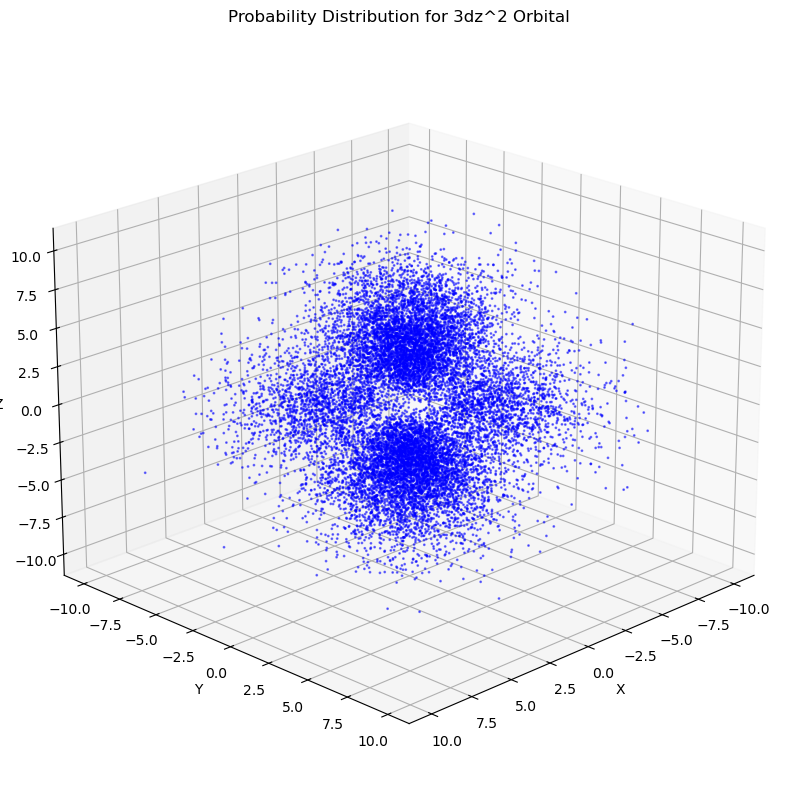

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
a0 = 0.529177 #Bohr radius in Angstroms
max = 1 / (36 * np.pi * a0**3) #Upper limit 
point_list = [] #List to store points in the range.
delta_x, delta_y, delta_z = 20, 20, 20 #Dimensions of the box
def cartesian_to_spherical(x, y, z): #Function to convert from cartesian to spherical coordinates.
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r) 
    return r,theta    
def run(u):
    i = 0 #Counter
    while i<u:
      x = np.random.uniform(-delta_x/2, delta_x/2) #Randomly generated x-value.
      y = np.random.uniform(-delta_y/2,delta_y/2) #Randomly generated y-value.
      z = np.random.uniform(-delta_z/2,delta_z/2) #Randomly generated z-value.
      w = np.random.uniform(0,max) #Randomly generated value in range of upper limit.
      r,theta = cartesian_to_spherical(x,y,z) #Setting the returned r and theta value to a variable.
      psi = (1 / 36) * (1 / a0)**(3/2) * (2 * r / (3 * a0))**2 * np.exp(-r / (3 * a0))*np.sqrt(2 / np.pi) * (3 * np.cos(theta)**2 - 1)  #Psi 
      psi2 = psi**2 #Psi^2
      if w<=psi2:
        point_list.append((x,y,z)) #Adding the randomly generated coordinates to the list if they fall in range.
        i+=1
run(15000) #15000 points sampled.
point_list = np.array(point_list) #Converting the list to a numpy array.
fig = plt.figure(figsize=(10, 10)) #Dimensions of plot.
ax = fig.add_subplot(projection='3d') #A 3D subplot.
ax.scatter(point_list[:, 0], point_list[:, 1], point_list[:, 2], s=1, c='blue', alpha=0.5) #Extracting coordinates from the array and plotting.
ax.view_init(elev=21, azim=45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Probability Distribution for 3dz^2 Orbital")
plt.show()

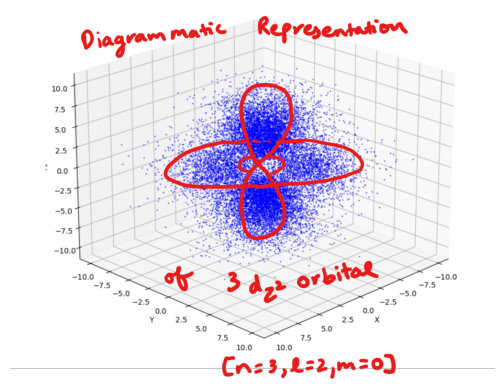

In [246]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://github.com/TP247/RamanData/blob/main/3dz.png?raw=true" 
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')  
plt.show()

Monte Carlo methods were used in the early computer era to simulate the probability distributions for orbitals. Knowing the physical shape of orbitals allows chemists to derive theories on electron transfer mechanisms and formation of molecules. Knowledge of the atom is vital to Chemistry and Physics.  

Monte Carlo algorithms are sort of like "brute" probability computations. It is interesting to see that we can attain results like the probability of sharing atleast a single birthday with someone else in the room and the ratio of points that could fall in an inscribed circle of a square without the use of exact mathematical formulas.  After this project, we also learnt that Monte Carlo methods may need extremely large samples sizes to portray accurate conditions. There exists a computational limit which is hard to overcome. This can restrict the results and pushes the need for highly efficient codes. However, it is still a powerful tool for visualization, as there is an intuitive feel for the process. We can see what manually solving for equations at every parameter could lead to, saving time and effort.

### References
- https://en.wikipedia.org/wiki/Monte_Carlo_method 
- https://www.probabilisticworld.com/birthday-problem-python-simulation/
- https://en.wikipedia.org/wiki/Birthday_problem
- https://blogs.sas.com/content/iml/2022/08/01/examples-monte-carlo-simulation.html
- https://www.scielo.br/j/rbef/a/VL5GpHW3xh5LPBr4NRjHfPg/?format=html#
- https://www.youtube.com/playlist?list=PLrUDBH2CfIykFmjq0b_fBPKj-3qqicI7f
- https://en.wikipedia.org/wiki/Hydrogen_atom
- https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/
- https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python

Manasvini used Latex to type the equations and primarily worked on the birthday problem. She also formatted the notebook. Tejas implemented the code for the orbitals and the Pi problem. Both contributed to explaining the code through comments.